In [1]:
import os
import sys
import math
import time
import numpy as np
import pandas as pd
from numpy import random as npr

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



In [2]:
SEED = 2021
SYNTHETC_DATASET_SIZE = 10_000
SAMPLE_SIZES = [0.1, 0.3, 0.5, 0.9]
ALPHA_SAMPLE_RATE = 20

USERPROFILE_DATASET_PATH = "../../datasets/restaurants/userprofile.csv"
USERCUISINE_DATASET_PATH = "../../datasets/restaurants/usercuisine.csv"
CHEFMOZCUISINE_DATASET_PATH = "../../datasets/restaurants/chefmozcuisine.csv"
RATINGS_DATASET_PATH = "../../datasets/restaurants/ratings_reformatted.csv"

## Load and transform restaurants data

Helper functions 

In [3]:
def prepare_user_profile_df(df):
    df = df.drop(["latitude", "longitude"], axis=1)
    df = df.replace("?", pd.NA)
    df = df.fillna(method="bfill")
    return df


def prepare_user_cuisine_df(df):
    df.drop_duplicates()
    df = df.join(pd.get_dummies(df["Rcuisine"]))
    df = df.drop("Rcuisine", axis=1)
    df = df.groupby("userID").sum()
    return df


def load_and_clean_users_df():
    user_profile_df = pd.read_csv(USERPROFILE_DATASET_PATH)
    user_cuisine_df = pd.read_csv(USERCUISINE_DATASET_PATH)
    user_profile_df = prepare_user_profile_df(user_profile_df)
    user_cuisine_df = prepare_user_cuisine_df(user_cuisine_df)

    users_df = pd.merge(user_profile_df, user_cuisine_df, on="userID")
    return users_df


def load_and_prepare_rest_cuisine_df():
    df = pd.read_csv(CHEFMOZCUISINE_DATASET_PATH)
    df = df.drop_duplicates()
    df = df.join(pd.get_dummies(df["Rcuisine"]))
    df = df.drop("Rcuisine", axis=1)
    df = df.groupby("placeID").sum()
    return df



In [4]:
users_df = load_and_clean_users_df()
users_df

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,...,Swiss,Tapas,Tea_House,Tex-Mex,Thai,Tibetan,Tunisian,Turkish,Vegetarian,Vietnamese
0,U1001,false,abstemious,informal,family,on foot,single,independent,1989,variety,...,0,0,0,0,0,0,0,0,0,0
1,U1002,false,abstemious,informal,family,public,single,independent,1990,technology,...,0,0,0,0,0,0,0,0,0,0
2,U1003,false,social drinker,formal,family,public,single,independent,1989,none,...,0,0,0,0,0,0,0,0,0,0
3,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,...,0,0,0,0,0,0,0,0,0,0
4,U1005,false,abstemious,no preference,family,public,single,independent,1992,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,false,casual drinker,no preference,family,public,single,independent,1991,variety,...,0,0,0,0,0,0,0,0,0,0
134,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,...,1,1,1,1,1,1,1,1,1,1
135,U1136,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,...,0,0,0,0,0,0,0,0,0,0
136,U1137,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,...,0,0,0,0,0,0,0,0,0,0


In [5]:
rests_df = load_and_prepare_rest_cuisine_df()
rests_df

,Afghan,African,American,Armenian,Asian,Bagels,Bakery,Bar,Bar_Pub_Brewery,Barbecue,...,Soup,Southern,Southwestern,Spanish,Steaks,Sushi,Thai,Turkish,Vegetarian,Vietnamese
placeID,,,,,,,,,,,,,,,,,,,,,
132001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ratings_df = pd.read_csv(RATINGS_DATASET_PATH)
ratings_df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [7]:
merged_df = pd.merge(ratings_df, users_df, on="userID")
merged_df = pd.merge(merged_df, rests_df, on="placeID")
merged_df

,userID,placeID,rating,food_rating,service_rating,smoker,drink_level,dress_preference,ambience,transport,...,Soup_y,Southern_y,Southwestern_y,Spanish_y,Steaks_y,Sushi_y,Thai_y,Turkish_y,Vegetarian_y,Vietnamese_y
0,U1077,135085,2,2,2,false,social drinker,elegant,family,public,...,0,0,0,0,0,0,0,0,0,0
1,U1108,135085,1,2,1,false,abstemious,informal,solitary,public,...,0,0,0,0,0,0,0,0,0,0
2,U1081,135085,1,2,1,false,casual drinker,informal,family,public,...,0,0,0,0,0,0,0,0,0,0
3,U1001,135085,0,1,1,false,abstemious,informal,family,on foot,...,0,0,0,0,0,0,0,0,0,0
4,U1056,135085,2,2,2,false,social drinker,informal,family,on foot,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,U1006,132922,2,1,2,true,social drinker,no preference,friends,car owner,...,0,0,0,0,0,0,0,0,0,0
869,U1003,132937,2,2,1,false,social drinker,formal,family,public,...,0,0,0,0,0,0,0,0,0,0
870,U1027,132937,1,1,1,true,social drinker,no preference,family,public,...,0,0,0,0,0,0,0,0,0,0
871,U1029,132937,1,1,1,true,casual drinker,formal,family,public,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rests_df['placeID'] = rests_df.index
rests_df = rests_df.reset_index(drop=True)

In [9]:
users_df["userID"] = users_df["userID"].astype("category").cat.codes

Merge ratings dataset, users dataset, and restaurants dataset into single tablem

In [10]:
merged_df["userID"] = merged_df["userID"].astype("category").cat.codes
merged_df

,userID,placeID,rating,food_rating,service_rating,smoker,drink_level,dress_preference,ambience,transport,...,Soup_y,Southern_y,Southwestern_y,Spanish_y,Steaks_y,Sushi_y,Thai_y,Turkish_y,Vegetarian_y,Vietnamese_y
0,76,135085,2,2,2,false,social drinker,elegant,family,public,...,0,0,0,0,0,0,0,0,0,0
1,107,135085,1,2,1,false,abstemious,informal,solitary,public,...,0,0,0,0,0,0,0,0,0,0
2,80,135085,1,2,1,false,casual drinker,informal,family,public,...,0,0,0,0,0,0,0,0,0,0
3,0,135085,0,1,1,false,abstemious,informal,family,on foot,...,0,0,0,0,0,0,0,0,0,0
4,55,135085,2,2,2,false,social drinker,informal,family,on foot,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,5,132922,2,1,2,true,social drinker,no preference,friends,car owner,...,0,0,0,0,0,0,0,0,0,0
869,2,132937,2,2,1,false,social drinker,formal,family,public,...,0,0,0,0,0,0,0,0,0,0
870,26,132937,1,1,1,true,social drinker,no preference,family,public,...,0,0,0,0,0,0,0,0,0,0
871,28,132937,1,1,1,true,casual drinker,formal,family,public,...,0,0,0,0,0,0,0,0,0,0


In [166]:
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN
import time

def _clean_dataset(df):
    df = df.drop(["userID", "placeID"], axis=1) # Drop ids
    df = df.astype("int64", errors="ignore") # Convert all numbers to int64
    return df


def fit_and_evaluate_models(df, models, sample_size, eval_kwargs):
    result = pd.DataFrame()
    for name, model in models.items():
        start = time.time()
        model.fit(df)
        end = time.time()
        print("Fitting of " + name)
        print(end - start)
        eval_result = evaluate(df, model.sample(sample_size), **eval_kwargs)
        eval_result["model_name"] = name
        result = pd.concat([result, eval_result])
    
    return result

In [167]:
from sdv.evaluation import evaluate

_comp_result = fit_and_evaluate_models(
    df=_clean_dataset(merged_df),
    models={"GaussianCopula": GaussianCopula(), "CTGAN": CTGAN(), "CopulaGAN": CopulaGAN()},
    sample_size=1_000,
    eval_kwargs={"aggregate": False}
)

/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/pytho

Fitting of GaussianCopula
62.19190740585327


/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o

Fitting of CTGAN
142.05580234527588


/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWi

Fitting of CopulaGAN
174.6882917881012


/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [314]:
rs = _comp_result[
    (_comp_result.metric != "BNLogLikelihood") &
    (_comp_result.metric != "GMLogLikelihood") &
    (_comp_result.metric != "KSTestExtended") &
    (_comp_result.metric != "ContinuousKLDivergence") &
    (_comp_result.metric != "DiscreteKLDivergence") &
    (_comp_result.metric != "CSTest")
]

In [315]:
rs_time_data = {'metric': ['FitTime', 'FitTime', 'FitTime'],
               'name': ['Fitting time', 'Fitting time', 'Fitting time'],
               'score': [1-0.16, 1-0.37, 1-0.46],
               'min_value': [0, 0, 0],
               'max_value': [1, 1, 1],
               'goal': ['MINIMIZE', 'MINIMIZE', 'MINIMIZE'],
               'model_name': ['GaussianCopula', 'CTGAN', 'CopulaGAN']}
rs_time = pd.DataFrame(rs_time_data)

In [316]:
rs = rs.append(rs_time)

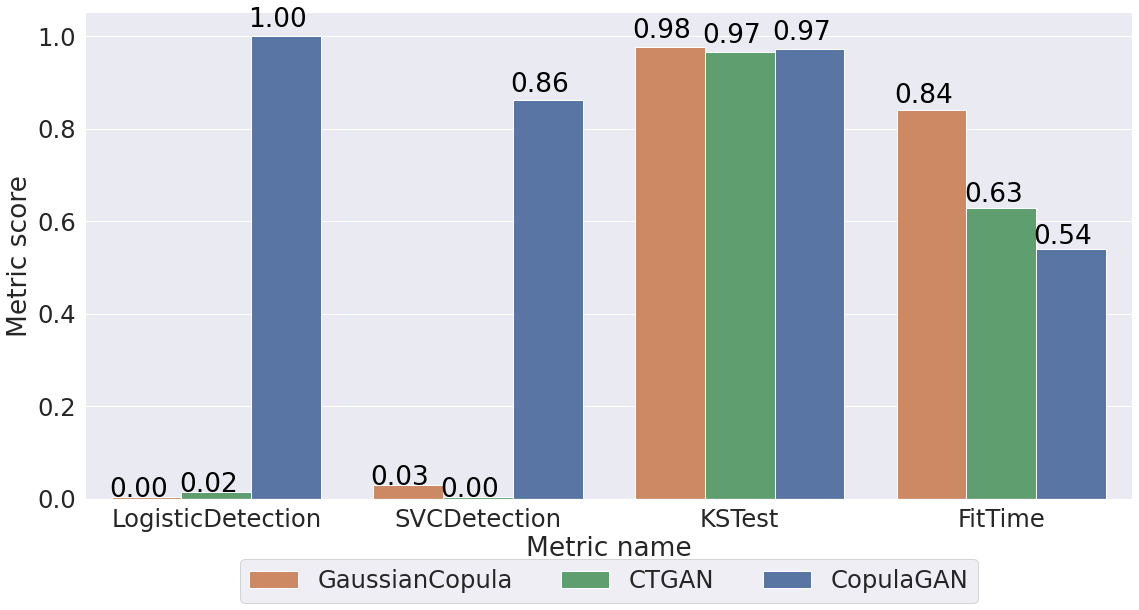

In [333]:
import matplotlib
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
rs["Model name"] = rs["model_name"]
rs["Metric score"] = rs["score"]
rs["Metric name"] = rs["metric"]
rcParams['figure.figsize'] = (3, 3)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.set(font_scale=2.2)  # crazy big
plot = sns.catplot(data=rs, x="Metric name", y="Metric score", hue="Model name", kind="bar", aspect=2, height=8, palette=[
    "C1", "C2", "C0"
], legend=False)
ax = plot.facet_axis(0,0)
hist_values = [rs.iloc[0, 2], rs.iloc[1, 2], rs.iloc[2, 2], rs.iloc[9, 2], 
               rs.iloc[3, 2], rs.iloc[4, 2], rs.iloc[5, 2], rs.iloc[10, 2], 
               rs.iloc[6, 2], rs.iloc[7, 2], rs.iloc[8, 2], rs.iloc[11, 2]]
for (p, val) in zip(ax.patches, hist_values):
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{:1.2f}'.format(val),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='medium')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)
plot.savefig("restaurants_generators.png", dpi=300)

## Generate synthetic data

In [342]:
from sdv.tabular import GaussianCopula, CopulaGAN, CTGAN


def fit_syn_generator_users(df):
    model = CopulaGAN()
    df = df.drop(["userID"], axis=1) # Drop ids
    df = df.astype("int64", errors="ignore") # Convert all numbers to int64
    model.fit(df.copy())
    return model

def fit_syn_generator_rests(df):
    model = CopulaGAN()
    df = df.drop(["placeID"], axis=1) # Drop ids
    df = df.astype("int64", errors="ignore") # Convert all numbers to int64
    model.fit(df.copy())
    return model

In [343]:
npr.seed(SEED)
syn_data_generator_users = fit_syn_generator_users(users_df)
syn_data_generator_rests = fit_syn_generator_rests(rests_df)

/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/pytho

In [307]:
npr.seed(SEED)
syn_rests_df = syn_data_generator_rests.sample(100)
syn_rests_df.head()

,Afghan,African,American,Armenian,Asian,Bagels,Bakery,Bar,Bar_Pub_Brewery,Barbecue,...,Southern,Southwestern,Spanish,Steaks,Sushi,Thai,Turkish,Vegetarian,Vietnamese,placeID
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,132038
1,0,-9223372036854775808,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,132864
2,0,-9223372036854775808,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,132839
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,133120
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,132224


In [308]:
npr.seed(SEED)
syn_users_df = syn_data_generator_users.sample(100)
syn_users_df.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,...,Swiss,Tapas,Tea_House,Tex-Mex,Thai,Tibetan,Tunisian,Turkish,Vegetarian,Vietnamese
0,45,false,abstemious,no preference,solitary,public,single,independent,1989,eco-friendly,...,0,0,0,0,0,0,0,0,0,0
1,1,true,social drinker,formal,friends,car owner,single,independent,1994,technology,...,0,0,0,0,0,0,0,0,0,0
2,9,false,casual drinker,no preference,family,public,single,kids,1988,none,...,0,0,0,0,0,0,0,0,0,0
3,2,false,casual drinker,no preference,friends,public,single,independent,1988,none,...,0,0,0,0,0,0,0,0,0,0
4,3,false,abstemious,no preference,solitary,public,single,kids,1995,variety,...,0,0,0,0,0,0,0,0,0,-9223372036854775808


In [309]:
syn_rests_df[syn_rests_df < 0] = 0

In [310]:
for col in list(syn_rests_df.columns[:-2]):
    syn_users_df.loc[syn_users_df[col] < 0, col] = 0

In [311]:
syn_users_df["userID"] = range(len(syn_users_df))
syn_rests_df["placeID"] = range(len(syn_rests_df))

## Fit DeepFM model

In [13]:
deepfm_input = merged_df.copy()
for col in deepfm_input.columns:
    deepfm_input[col] = deepfm_input[col].astype("category")

In [14]:
from deeptables.models.deeptable import DeepTable, ModelConfig
from deeptables.models import deepnets
from deeptables.datasets import dsutils
from tensorflow import keras
from deeptables.models import deeptable
from sklearn.model_selection import train_test_split

In [42]:
npr.seed(SEED)
y = deepfm_input["rating"].astype("int64")
X = deepfm_input.drop(["rating", "placeID", "userID", "food_rating", "service_rating"], axis=1)
x_train, x_tests, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_results = []
net = deepnets.DeepFM
conf = ModelConfig(
    nets=net, 
    optimizer=keras.optimizers.RMSprop(),
    auto_discrete=True,
    earlystopping_patience=20
)

dt = deeptable.DeepTable(config=conf)
start = time.time()
model, history = dt.fit(x_train, y_train, epochs=50, batch_size=64)
end = time.time()
print('Training of DeepFM')
print(end - start)

09-23 16:21:32 I deeptables.m.deeptable.py 335 - X.Shape=(698, 178), y.Shape=(698,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear', 'fm_nets', 'dnn_nets'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['accuracy'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=True, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=0.3, stacking_op='add', output_use_bias=True, apply_class_weight=False, optimizer=<tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x7f62683ded50>, loss='auto', dnn_params={'hidden_units': ((128, 0, False), (64, 0, False)), 'activation': 'relu'}, autoint_params={'num_attention': 3, 'num_heads':

09-23 16:21:32 W hypernets.t.cache.py 185 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/hypernets/tabular/cache.py", line 152, in _cache_call
    cache_key = hash_data(key_items)
  File "/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/hypernets/utils/common.py", line 231, in hash_data
    data = {hash_data(k): hash_data(v) if v is not None else v for k, v in data.items()}
  File "/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/hypernets/utils/common.py", line 231, in <dictcomp>
    data = {hash_data(k): hash_data(v) if v is not None else v for k, v in data.items()}
  File "/mnt/ess_storage/DL_0/lake/EStavinova/conda/envs/icdm_1/lib/python3.7/site-packages/hypernets/utils/common.py", line 229, in hash_data
    data = [hash_data(x) if x is not None 

09-23 16:21:32 I hypernets.u.common.py 164 - 3 class detected, inferred as a [multiclass classification] task
09-23 16:21:32 I deeptables.m.preprocessor.py 258 - Preparing features...
09-23 16:21:32 I deeptables.m.preprocessor.py 333 - Preparing features taken 0.01711750030517578s
09-23 16:21:32 I deeptables.m.preprocessor.py 338 - Data imputation...
09-23 16:21:32 I deeptables.m.preprocessor.py 380 - Imputation taken 0.06131935119628906s
09-23 16:21:32 I deeptables.m.preprocessor.py 385 - Categorical encoding...
09-23 16:21:33 I deeptables.m.preprocessor.py 390 - Categorical encoding taken 0.11244845390319824s
09-23 16:21:33 I deeptables.m.preprocessor.py 395 - Data discretization...
09-23 16:21:33 I hypernets.t.sklearn_ex.py 558 - 0 variables to discrete.
09-23 16:21:33 I deeptables.m.preprocessor.py 401 - Discretization taken 0.0006318092346191406s
09-23 16:21:33 I deeptables.m.preprocessor.py 193 - fit_transform taken 0.27033400535583496s
09-23 16:21:33 I deeptables.m.deeptable.py 

In [43]:
score = dt.evaluate(x_tests, y_test, batch_size=512, verbose=0)
score

09-23 16:21:58 I deeptables.m.preprocessor.py 239 - Transform [X]...
09-23 16:21:58 I deeptables.m.preprocessor.py 246 - transform_X taken 0.08778500556945801s
09-23 16:21:58 I deeptables.m.preprocessor.py 227 - Transform [y]...
09-23 16:21:58 I deeptables.m.preprocessor.py 233 - transform_y taken 0.0002536773681640625s
09-23 16:21:58 I deeptables.m.deepmodel.py 169 - Performing evaluation...


{'loss': 1.069885015487671, 'accuracy': 0.4228571355342865}

In [44]:
syn_users_df["_merge_key"] = syn_rests_df["_merge_key"] = 1
syn_merged_df = pd.merge(syn_users_df, syn_rests_df, on="_merge_key")
syn_merged_df = syn_merged_df.drop(["_merge_key"], axis=1)

In [45]:
deepfm_syn_input = syn_merged_df.copy()
for col in deepfm_syn_input.columns:
    deepfm_syn_input[col] = deepfm_syn_input[col].astype("category")

In [47]:
npr.seed(SEED)
resp = dt.predict(deepfm_syn_input.drop(["userID", "placeID"], axis=1))

09-23 16:22:10 I deeptables.m.deeptable.py 661 - Perform prediction...
09-23 16:22:10 I deeptables.m.preprocessor.py 239 - Transform [X]...
09-23 16:22:11 I deeptables.m.preprocessor.py 246 - transform_X taken 0.919633150100708s
09-23 16:22:11 I deeptables.m.deepmodel.py 142 - Performing predictions...
09-23 16:22:12 I deeptables.m.deeptable.py 540 - predict_proba taken 1.6460607051849365s
09-23 16:22:12 I deeptables.m.deeptable.py 575 - Reverse indicators to labels.


In [48]:
dct = {}
for i in resp:
    if i in dct:
        dct[i] += 1
    else:
        dct[i] = 0
dct

{1: 5780, 2: 4211, 0: 6}

In [49]:
matrix = pd.DataFrame()
matrix["rating"] = resp
matrix["user_id"] = deepfm_syn_input["userID"].astype("category").cat.codes
matrix["item_id"] = deepfm_syn_input["placeID"].astype("category").cat.codes

In [50]:
mt = matrix.drop_duplicates(["user_id", "item_id"]).reset_index().drop("index", axis=1)
mt

,rating,user_id,item_id
0,1,0,0
1,2,0,1
2,1,0,2
3,1,0,3
4,1,0,4
...,...,...,...
9995,1,99,95
9996,1,99,96
9997,1,99,97
9998,1,99,98


In [51]:
mtp = mt.pivot(index="user_id", columns="item_id", values="rating")
mtp

item_id,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,1,...,2,2,1,2,2,2,2,2,1,2
3,2,2,1,2,2,1,2,1,2,1,...,1,1,1,2,1,2,1,1,1,2
4,1,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,2,2,2,2,2,2,2,1,...,2,2,1,2,2,2,2,2,1,2
96,1,2,1,1,2,1,1,1,1,1,...,1,1,1,2,1,2,1,1,1,2
97,1,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Make similarity matrix

Creating a similarity matrix between users and restaurants based on users' food preference and restaurants' cuisines.

In [52]:
from sklearn.metrics.pairwise import cosine_similarity


def make_similarity_matrix(users_df, rests_df):
    users_food_pref_df = users_df.drop(['userID', '_merge_key'], axis=1)
    rests_food_pref_df = rests_df.drop(['placeID', '_merge_key'], axis=1)
    users_food_pref_df = users_food_pref_df[rests_food_pref_df.columns]
    return cosine_similarity(users_food_pref_df, rests_food_pref_df)

In [53]:
sim_matrix = make_similarity_matrix(syn_users_df, syn_rests_df)
sim_matrix

array([[0.2236068 , 0.2236068 , 0.37796447, ..., 0.        , 0.2236068 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4472136 , 0.37796447, ..., 0.        , 0.4472136 ,
        0.        ],
       ...,
       [0.        , 0.31622777, 0.26726124, ..., 0.        , 0.31622777,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
sim_matrix = np.where(sim_matrix < 0.33, 0, sim_matrix)
sim_matrix = np.where(sim_matrix >= 0.66, 2, sim_matrix)
sim_matrix = np.where((sim_matrix >= 0.33) & (sim_matrix < 0.66), 1, sim_matrix)
sim_matrix

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Experiments

In [157]:
import importlib
sys.path.insert(0, '../../modules/modules/')

import evaluator, trainers, utils, models
importlib.reload(models)
importlib.reload(trainers)
importlib.reload(evaluator)

<module 'evaluator' from '../../modules/modules/evaluator.py'>

In [158]:
class ResponseFunction:
    def __init__(self, heu_matrix, nn_matrix, noise_matrix):
        assert heu_matrix.shape == nn_matrix.shape
        self._heu_matrix = heu_matrix
        self._nn_matrix = nn_matrix
        self._noise_matrix = noise_matrix
        
    def __call__(self, a1: float, a2: float):
        a3 = max(0.0, 1 - a1 - a2)
        
        return (
            a1 * self._heu_matrix
            + a2 * self._nn_matrix
            + a3 * npr.normal(1, 1, size=self._heu_matrix.shape)
            #to avoid identical zeros in NMF
            + 0.00001
        )    

In [160]:
_resp_fn_config = evaluator.ResponseFunctionConfig(
    factory=ResponseFunction,
    args=[sim_matrix, mtp, npr.normal(1, 1, size=sim_matrix.shape)]
)

_evaluators = [
    evaluator.TrainTestExecutorConfig(
        factory=trainers.NmfTrainTestExecutor,
        args={},
        model_name="nmf"
    ),
    evaluator.TrainTestExecutorConfig(
        factory=trainers.SvdTrainTestExecutor,
        args={},
        model_name="svd"
    ),
    evaluator.TrainTestExecutorConfig(
        factory=trainers.KnnTrainTestExecutor,
        args={},
        model_name="knn"
    )
]

np.random.seed(SEED)
_evaluator = evaluator.Evaluator(_resp_fn_config, n_proc=1)
start = time.time()
results = _evaluator.evaluate(
    _evaluators, 
    a_sample_rate=ALPHA_SAMPLE_RATE,
    test_size=0.1, 
    sample_sizes=SAMPLE_SIZES
)
end = time.time()
print('Total time: ' + str(end - start))

In [72]:
results = utils.group_points_by_minimum_error(results)
results

In [ ]:
results = results.rename(
    columns={
        "a1": "α₁",
        "a2": "α₂",
        "rmse": "RMSE",
        "model_name": "Model"
    }
)

results["Model"] = results["Model"].map(
    {
        "knn": "kNN",
        "svd": "SVD",
        "nmf": "NMF"
    }
)

In [ ]:
from plotly import graph_objects as go


def visualize_3d_plot(results, sample_sizes):
    name_to_color = {
        "kNN": "yellow",
        "SVD": "red",
        "NMF": "blue"
    }
    for sample_size in sample_sizes:
        data = results[results["sample_size"] == sample_size]
        fig = go.Figure(
            layout=go.Layout(
                height=800,
                width=1000,
                font=dict(size=16),
                margin=dict(l=20, r=20, t=20, b=20),
                scene=dict(
                    xaxis = dict(title="α₁"),
                    yaxis = dict(title="α₂"),
                    zaxis = dict(title="", range=[0, 1.1], tickvals=[0.2, 0.4, 0.6, 0.8, 1])
                ),
                scene_camera=dict(
                    up=dict(x=0, y=0, z=1),
                    center=dict(x=0, y=0, z=0),
                    eye=dict(x=1.2, y=1.8, z=1.0)
                )
            ),
            data=[
                go.Scatter3d(
                    name=model_name,
                    x=data[data["Model"] == model_name]["α₁"],
                    y=data[data["Model"] == model_name]["α₂"],
                    z=data[data["Model"] == model_name]["RMSE"],
                    mode="markers",
                    marker=dict(
                        size=2,
                        color=name_to_color[model_name],
                        line=dict(width=1, color='DarkSlateGrey')
                    )
                ) for model_name in ["NMF", "SVD", "kNN"]
            ]
        )
        fig.update_layout(showlegend=False)
        fig.show("notebook")
        
        
visualize_3d_plot(results, SAMPLE_SIZES)